# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | pochaiv
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | pemba
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | montmagny
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | trairi
Processing Record 18 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 19 of Set 1 | dhromolaxia
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | po

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.58,67,28,0.83,TF,1738602701
1,waitangi,-43.9535,-176.5597,14.90,90,57,4.47,NZ,1738602809
2,margaret river,-33.9500,115.0667,15.23,81,0,6.10,AU,1738602810
3,chonchi,-42.6128,-73.8092,14.51,54,100,1.66,CL,1738602516
4,constitucion,-35.3333,-72.4167,21.64,53,10,7.43,CL,1738602812


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.58,67,28,0.83,TF,1738602701
1,waitangi,-43.9535,-176.5597,14.90,90,57,4.47,NZ,1738602809
2,margaret river,-33.9500,115.0667,15.23,81,0,6.10,AU,1738602810
3,chonchi,-42.6128,-73.8092,14.51,54,100,1.66,CL,1738602516
4,constitucion,-35.3333,-72.4167,21.64,53,10,7.43,CL,1738602812


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

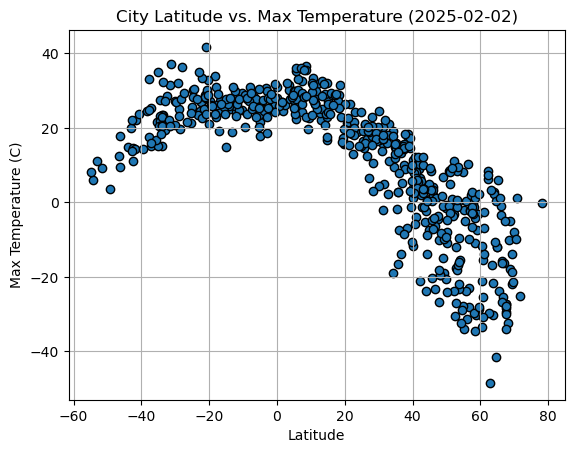

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2025-02-02)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

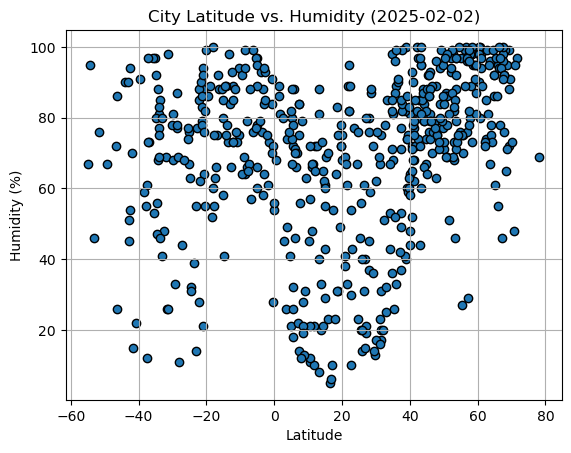

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2025-02-02)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

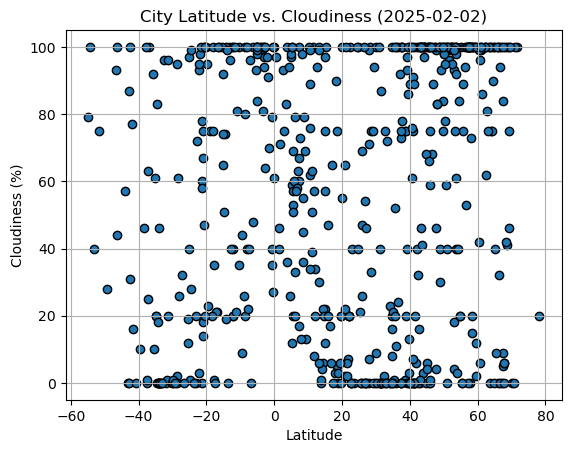

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2025-02-02)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

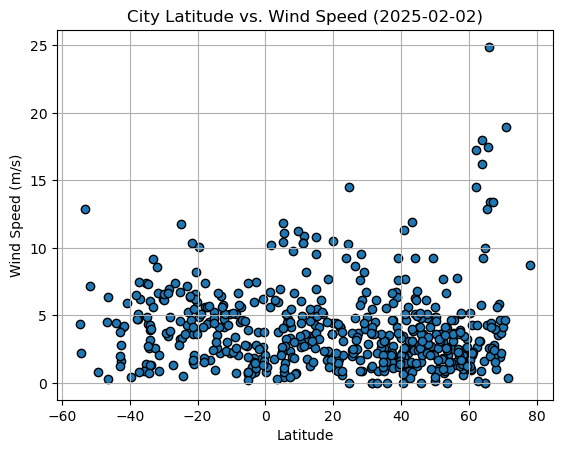

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2025-02-02)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linreg(x, y, xlabel="X-axis", ylabel="Y-label", title="title"):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * np.array(x) + intercept
    plt.scatter(x, y, color='skyblue', edgecolors='black')
    plt.plot(x, regress_values, color='red', linewidth=2, label=f"y = {slope:.2f}x + {intercept:.2f}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    print(f"The r-squared value is {r_value**2}.")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,jamestown,42.0970,-79.2353,6.42,100,100,5.66,US,1738602782
6,pochaiv,50.0051,25.5118,-1.52,71,98,4.92,UA,1738602815
7,lompoc,34.6391,-120.4579,9.40,98,100,2.06,US,1738602816
11,montmagny,48.9734,2.3469,6.80,84,40,4.63,FR,1738602821
12,lihue,21.9789,-159.3672,18.77,82,20,4.12,US,1738602822


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.58,67,28,0.83,TF,1738602701
1,waitangi,-43.9535,-176.5597,14.90,90,57,4.47,NZ,1738602809
2,margaret river,-33.9500,115.0667,15.23,81,0,6.10,AU,1738602810
3,chonchi,-42.6128,-73.8092,14.51,54,100,1.66,CL,1738602516
4,constitucion,-35.3333,-72.4167,21.64,53,10,7.43,CL,1738602812


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.7163095090871154.


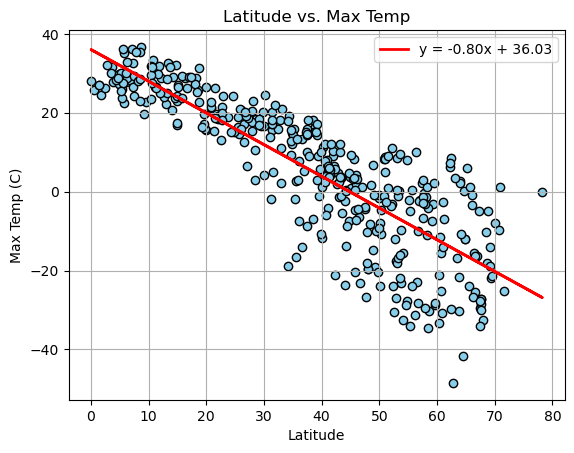

In [42]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], xlabel = "Latitude", ylabel = "Max Temp (C)", title = "Latitude vs. Max Temp")

The r-squared value is 0.26456192731175776.


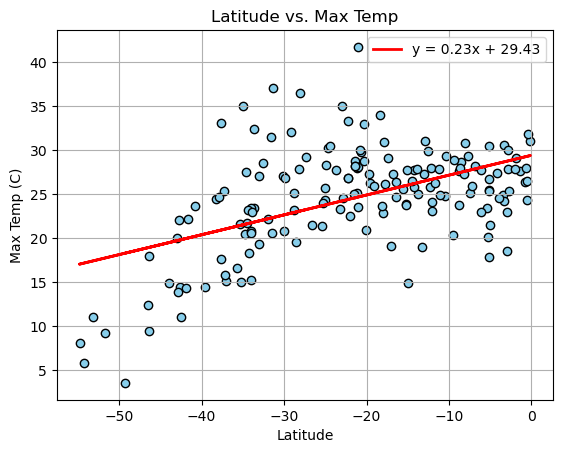

In [43]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], xlabel = "Latitude", ylabel = "Max Temp (C)", title = "Latitude vs. Max Temp")

**Discussion about the linear relationship:** Strong negative correlation when looking at the northern hemisphere values, with an r-squared of 0.716. Correlation is much weaker when looking at southern hemisphere values, with an r-squared value of 0.265 and slight positive trend noticed. Linear relationship fits northern hemisphere much better, southern hemisphere may be better fitted with a polynomial given the shape of the data.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.2816997183938452.


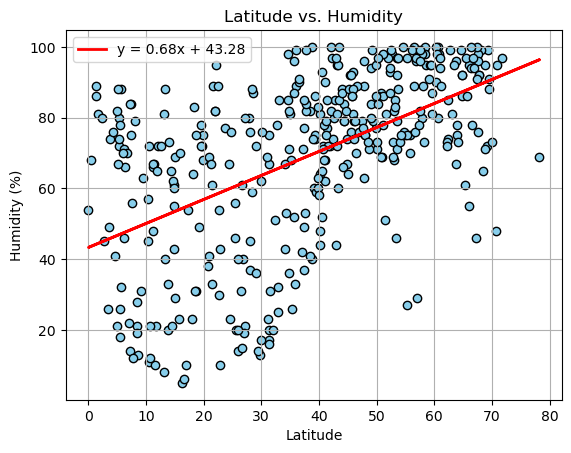

In [44]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], xlabel = "Latitude", ylabel = "Humidity (%)", title = "Latitude vs. Humidity")

The r-squared value is 0.055557294654943995.


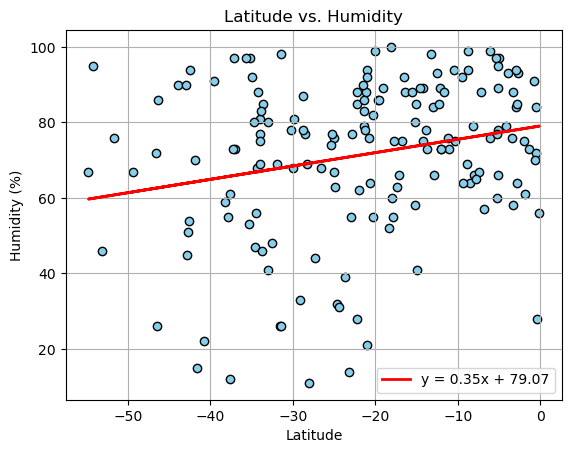

In [45]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], xlabel = "Latitude", ylabel = "Humidity (%)", title = "Latitude vs. Humidity")

**Discussion about the linear relationship:** Weak positive correlation observed for northern hemisphere, r-squared of 0.281. Very weak positive correlation for southern hemisphere, r-squared 0.056. Southern hemisphere data does not appear to have any strong noticeable trends for humidity and latitude, while northern hemisphere shows a weak, positive linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.031045162318512134.


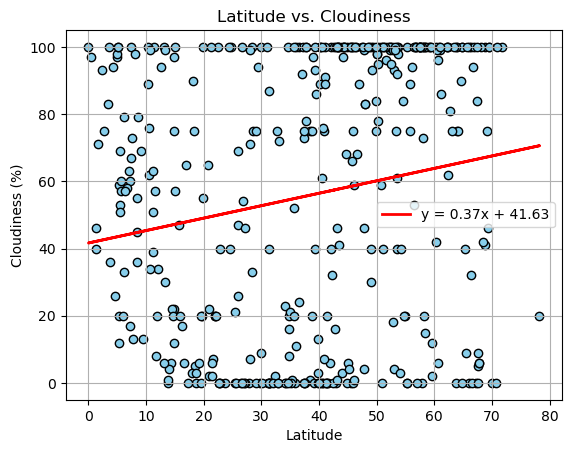

In [46]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], xlabel = "Latitude", ylabel = "Cloudiness (%)", title = "Latitude vs. Cloudiness")

The r-squared value is 0.10505343090688773.


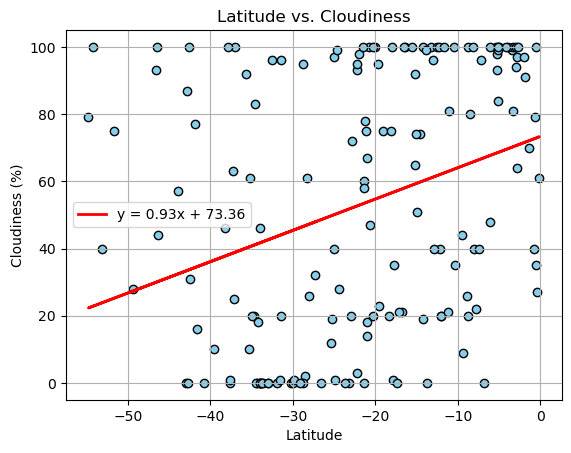

In [47]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], xlabel = "Latitude", ylabel = "Cloudiness (%)", title = "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** Very weak positive trend for both northern (r-squared 0.031), and southern hemisphere (r-squared 0.105). Data suggests there is no noticeable relationship between latitude and cloudiness, which makes sense as cloudiness depends on the day, and not seasonal trends that would be correlated with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 9.200887080658274e-07.


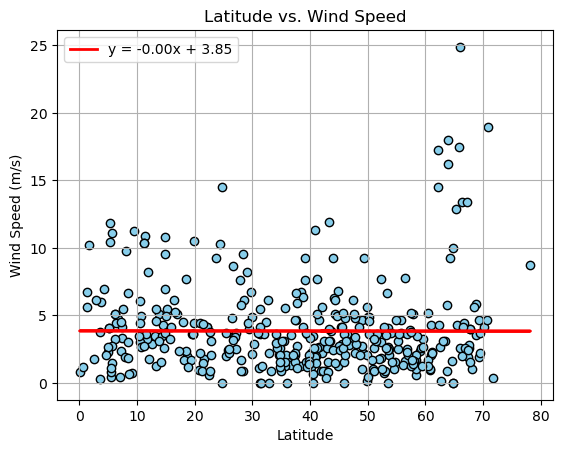

In [48]:
# Northern Hemisphere
plot_linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], xlabel = "Latitude", ylabel = "Wind Speed (m/s)", title = "Latitude vs. Wind Speed")

The r-squared value is 0.029656157656295326.


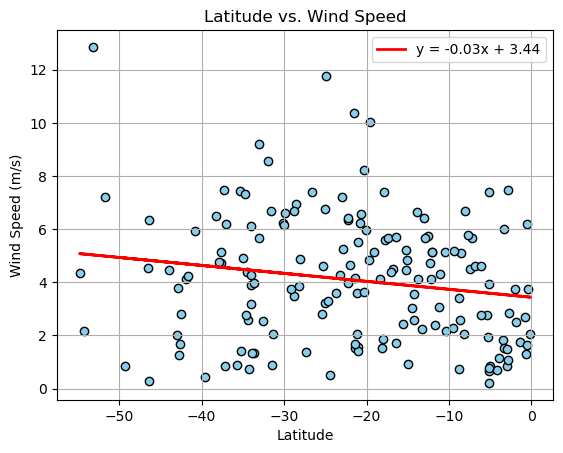

In [49]:
# Southern Hemisphere
plot_linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], xlabel = "Latitude", ylabel = "Wind Speed (m/s)", title = "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** Both northern and southern hemisphere have very small r-squared values (<0.05), indicating that the linear relationship between wind speed and latitude is very weak. Both regression lines have slopes near zero, indicating wind speed does not vary greatly with latitude. No obvious relationship shows up when looking at the scatter plots.